In [2]:
import torch
import torch.nn as nn
import numpy as np
import os

In [3]:
from star.pytorch.star import STAR

In [7]:
#demo file - load_torch.py

from star.pytorch.star import STAR
import numpy as np
from numpy import newaxis
import pickle
import os
import torch

star = STAR(gender='female')
betas = np.array([
            np.array([ 2.25176191, -3.7883464, 0.46747496, 3.89178988,
                      2.20098416, 0.26102114, -3.07428093, 0.55708514,
                      -3.94442258, -2.88552087])])
num_betas=10
batch_size=1
m = STAR(gender='male',num_betas=num_betas)

# Zero pose
poses = torch.FloatTensor(np.zeros((batch_size,72)))
betas = torch.FloatTensor(betas)

trans = torch.FloatTensor(np.zeros((batch_size,3)))
model = star.forward(poses, betas,trans)
shaped = model.v_shaped[-1, :, :]
print(shaped)
print(shaped.type)
print(shaped.shape)

tensor([[ 0.0502,  0.5446,  0.0951],
        [ 0.0434,  0.5311,  0.1027],
        [ 0.0540,  0.5260,  0.0949],
        ...,
        [-0.0661,  0.4775,  0.0090],
        [-0.0663,  0.4794,  0.0103],
        [-0.0689,  0.4776,  0.0127]])
<built-in method type of Tensor object at 0x10bba93a0>
torch.Size([6890, 3])


In [9]:
num_betas = 300
batch_size=1
poses = torch.FloatTensor(np.zeros((batch_size,72)))
betas = torch.FloatTensor(np.empty((batch_size,num_betas)))
#betas = ~~~ np.normal
trans = torch.FloatTensor(np.zeros((batch_size,3)))

star_ = STAR(gender='female',num_betas=num_betas)
print(poses.shape[0])
x = star_.forward(pose=poses , betas=betas , trans=trans)
shaped = x.v_shaped[-1, :, :]
print(shaped)
print(shaped.type)
print(shaped.shape)
betas

1
tensor([[ 4.6453e-02,  4.7448e-01,  8.4272e-02],
        [ 4.0282e-02,  4.6100e-01,  9.3512e-02],
        [ 5.1284e-02,  4.5584e-01,  8.5342e-02],
        ...,
        [-7.4294e-02,  4.0946e-01, -1.4796e-03],
        [-7.4568e-02,  4.1136e-01, -1.7024e-04],
        [-7.7376e-02,  4.0952e-01,  2.8054e-03]])
<built-in method type of Tensor object at 0x107262430>
torch.Size([6890, 3])


tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [10]:
shaped.numpy()[:, 1]

array([0.474479  , 0.46100092, 0.45583543, ..., 0.40946224, 0.41136366,
       0.40951803], dtype=float32)

In [11]:
x_point = []
y_point = []
z_point = []
for i in range (6890):
    line = x[0][i]
    x_point.append(line[0].item())
    y_point.append(line[1].item())
    z_point.append(line[2].item())

print(x_point)
print(y_point)
print(z_point)

[0.046452514827251434, 0.040281929075717926, 0.05128385126590729, 0.057538386434316635, 0.04746052995324135, 0.03743213787674904, 0.05858331173658371, 0.06438910961151123, 0.06476262956857681, 0.06902889907360077, 0.0680592805147171, 0.06292008608579636, 0.06380719691514969, 0.05757980793714523, 0.059509359300136566, 0.0644276887178421, 0.025169778615236282, 0.030646027997136116, 0.03458660840988159, 0.02837413176894188, 0.016000906005501747, 0.0172121562063694, 0.012302005663514137, 0.011813269928097725, 0.019722789525985718, 0.02557399868965149, 0.02056979387998581, 0.01839197240769863, 0.014823874458670616, 0.016471730545163155, 0.012975240126252174, 0.011764274910092354, 0.018022097647190094, 0.01835942640900612, 0.015849972143769264, 0.014589433558285236, 0.015092789195477962, 0.011984632350504398, 0.007888445630669594, 0.008682353422045708, 0.041337739676237106, 0.03650800138711929, 0.031276170164346695, 0.03583451360464096, 0.015953566879034042, 0.019644614309072495, 0.019829012

In [13]:
print(max(x_point)-min(x_point))

1.6786925792694092


(-2.0, 2.0)

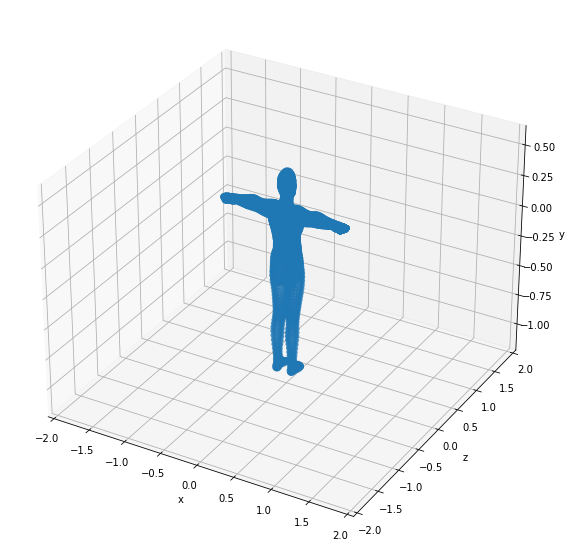

In [7]:
from mpl_toolkits import mplot3d

%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter(x_point, z_point, y_point, cmap='viridis', linewidth=0.1)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')

plt.xlim(-2,2)
plt.ylim(-2,2)
#plt.zlim(-2,2)

#open3d

In [8]:
import pickle
 
with open('foot_f.obj', 'rb') as file:    # james.p 파일을 바이너리 읽기 모드(rb)로 열기
    foot_f = pickle.load(file)
    print(foot_f)

[[[3212, 3452, 5505], [3213, 3453, 5505], [3214, 3454, 5505]], [[3214, 3454, 5506], [3213, 3453, 5506], [3215, 3455, 5506]], [[3216, 3456, 5507], [3217, 3457, 5507], [3218, 3458, 5507]], [[3218, 3458, 5508], [3217, 3457, 5508], [3219, 3459, 5508]], [[3220, 3460, 5509], [3221, 3461, 5509], [3222, 3462, 5509]], [[3222, 3462, 5510], [3221, 3461, 5510], [3223, 3463, 5510]], [[3224, 3464, 5511], [3225, 3465, 5511], [3226, 3466, 5511]], [[3226, 3466, 5512], [3225, 3465, 5512], [3227, 3467, 5512]], [[3228, 3468, 5513], [3229, 3469, 5513], [3230, 3470, 5513]], [[3230, 3470, 5514], [3229, 3469, 5514], [3231, 3471, 5514]], [[3232, 3472, 5515], [3233, 3473, 5515], [3234, 3474, 5515]], [[3234, 3474, 5516], [3233, 3473, 5516], [3235, 3475, 5516]], [[3236, 3476, 5517], [3237, 3477, 5517], [3238, 3478, 5517]], [[3238, 3478, 5518], [3237, 3477, 5518], [3239, 3479, 5518]], [[3237, 3477, 5519], [3240, 3480, 5519], [3239, 3479, 5519]], [[3239, 3479, 5520], [3240, 3480, 5520], [3241, 3481, 5520]], [[3234,

In [9]:
foot_v_index=[]
for i in range(len(foot_f)):
    if (foot_f[i][0][0]-1) not in foot_v_index :
        foot_v_index.append(foot_f[i][0][0]-1)
    if (foot_f[i][1][0]-1) not in foot_v_index :
        foot_v_index.append(foot_f[i][1][0]-1)
    if (foot_f[i][2][0]-1) not in foot_v_index :
        foot_v_index.append(foot_f[i][2][0]-1)

print(len(foot_v_index))
print(foot_v_index)

251
[3211, 3212, 3213, 3214, 3215, 3216, 3217, 3218, 3219, 3220, 3221, 3222, 3223, 3224, 3225, 3226, 3227, 3228, 3229, 3230, 3231, 3232, 3233, 3234, 3235, 3236, 3237, 3238, 3239, 3240, 3241, 3242, 3243, 3244, 3245, 3246, 3247, 3248, 3249, 3250, 3251, 3252, 3253, 3254, 3255, 3256, 3257, 3258, 3259, 3260, 3261, 3262, 3263, 3264, 3265, 3266, 3267, 3268, 3269, 3270, 3271, 3272, 3273, 3274, 3275, 3276, 3277, 3278, 3279, 3280, 3281, 3282, 3283, 3284, 3285, 3286, 3287, 3288, 3289, 3290, 3291, 3292, 3293, 3294, 3295, 3296, 3297, 3298, 3299, 3300, 3301, 3302, 3303, 3304, 3305, 3306, 3307, 3308, 3309, 3310, 3311, 3312, 3313, 3314, 3315, 3316, 3317, 3318, 3336, 3337, 3338, 3339, 3340, 3341, 3342, 3343, 3344, 3345, 3346, 3347, 3348, 3349, 3350, 3351, 3352, 3353, 3354, 3355, 3356, 3357, 3358, 3359, 3360, 3361, 3362, 3363, 3364, 3365, 3366, 3367, 3368, 3369, 3370, 3371, 3372, 3373, 3374, 3375, 3376, 3377, 3378, 3379, 3380, 3381, 3382, 3383, 3384, 3385, 3386, 3387, 3388, 3389, 3390, 3391, 3392, 3393,

In [10]:
foot_v = []
for i in range(len(foot_v_index)):
    foot_v.append(shaped[foot_v_index[i]])
    
print(len(foot_v))
print(foot_v)

251
[tensor([ 0.1215, -1.1008,  0.1451]), tensor([ 0.1203, -1.0965,  0.1444]), tensor([ 0.1159, -1.0966,  0.1451]), tensor([ 0.1147, -1.1016,  0.1461]), tensor([ 0.0822, -1.1028,  0.1548]), tensor([ 0.0802, -1.0932,  0.1567]), tensor([ 0.0722, -1.0950,  0.1543]), tensor([ 0.0713, -1.1060,  0.1524]), tensor([ 0.0995, -1.1023,  0.1540]), tensor([ 0.1008, -1.1055,  0.1507]), tensor([ 0.1057, -1.1054,  0.1502]), tensor([ 0.1074, -1.1021,  0.1535]), tensor([ 0.1436, -1.0974,  0.1162]), tensor([ 0.1436, -1.1018,  0.1140]), tensor([ 0.1479, -1.1015,  0.1123]), tensor([ 0.1492, -1.0978,  0.1134]), tensor([ 0.1294, -1.1005,  0.1340]), tensor([ 0.1296, -1.1047,  0.1312]), tensor([ 0.1338, -1.1040,  0.1298]), tensor([ 0.1357, -1.1008,  0.1315]), tensor([ 0.0836, -1.0893,  0.1338]), tensor([ 0.0701, -1.0884,  0.1309]), tensor([ 0.0707, -1.0932,  0.1448]), tensor([ 0.0826, -1.0907,  0.1472]), tensor([ 0.0648, -1.1017,  0.1409]), tensor([ 0.0638, -1.0987,  0.1258]), tensor([ 0.0706, -1.1062,  0.1249

In [11]:
x_=[]
y_=[]
z_=[]
for i in range(len(foot_v)):
    if (foot_v[i][1].item()<1 ) :
        x_.append(foot_v[i][0].item())
        y_.append(foot_v[i][1].item())
        z_.append(foot_v[i][2].item())

(-0.1, 0.2)

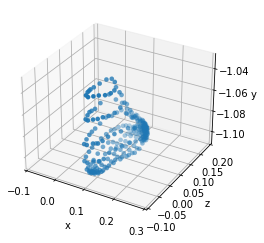

In [12]:
from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x_, z_, y_, cmap='viridis', linewidth=0.1)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')
plt.xlim(-0.1,0.3)
plt.ylim(-0.1,0.2)

In [18]:
thefile = open('test1.obj', 'w')
for item in shaped:
  thefile.write("v {0} {1} {2}\n".format(item[0],item[1],item[2]))

for item in foot_f:
  thefile.write("f {0}// {1}// {2}//\n".format(item[0][0],item[1][0],item[2][0]))  

thefile.close()

'''for item in foot_f:
  thefile.write("f {0}//{0} {1}//{1} {2}//{2}\n".format(item[0],item[1],item[2]))  '''

'for item in foot_f:\n  thefile.write("f {0}//{0} {1}//{1} {2}//{2}\n".format(item[0],item[1],item[2]))  '

In [14]:
from obj2html import obj2html
from IPython.display import display, HTML

obj_path = 'test1.obj'

camera={
  "fov": 15,
  "aspect": 2,
  "near": 0.1,
  "far": 100,
  "pos_x": 0.4,
  "pos_y": -2,
  "pos_z": 0.05,
  "orbit_x": 0,
  "orbit_y": 20,
  "orbit_z": 0,
}
light={
  "color": "0xFFFFFF",
  "intensity": 0.5,
  "pos_x": 0.4,
  "pos_y": -1.075,
  "pos_z": 0.05,
  "target_x": 0,
  "target_y": 0,
  "target_z": 0,
}
obj_options={
  "scale_x": 10,
  "scale_y": 10,
  "scale_z": 10,
}

obj2html(obj_path, 'index.html', camera, light, obj_options)

display(HTML('index.html'))